In [47]:
import os
import numpy as np
import rosbag
import matplotlib.pyplot as plt
import custom_utils.data_conversion as data_conversion
import custom_utils.depth_filtering as depth_filtering
import numpy as np
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression

DATAFILE = "/scratchdata/doors"

In [48]:
# Open bag file
bag_file_path = os.path.join(DATAFILE, "raw.bag")
bag = rosbag.Bag(bag_file_path)

In [49]:
wait = 0
for topic, msg, t in bag.read_messages(topics=["/camera/depth/points"]):
    wait += 1
    if wait == 6:
        print(len(msg.data))
        pc_raw = np.frombuffer(msg.data, dtype=np.uint8)
        print(pc_raw)
        print(msg.fields)
        

3095792
[144 120 229 ...  90  92  64]
[name: "x"
offset: 0
datatype: 7
count: 1, name: "y"
offset: 4
datatype: 7
count: 1, name: "z"
offset: 8
datatype: 7
count: 1]


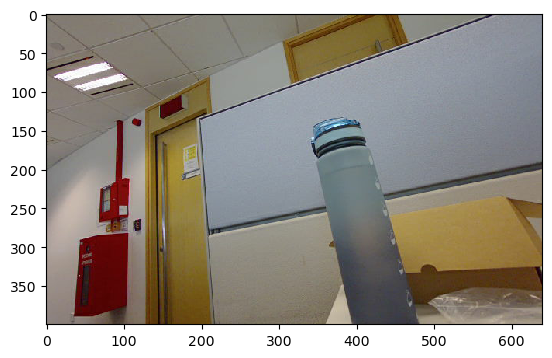

In [50]:
wait = 0
for topic, msg, t in bag.read_messages(topics=["/camera/color/image_raw"]):
    wait += 1
    if wait == 5:
        img = data_conversion.topic_to_image(msg)
        break

plt.imshow(img)
plt.imsave(os.path.join(DATAFILE, "color.png"), img)

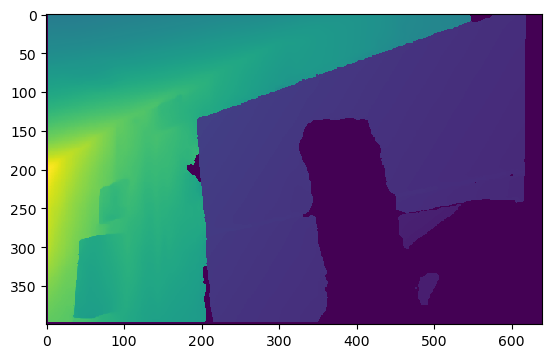

In [51]:
wait = 0

for topic, msg, t in bag.read_messages(topics=["/camera/depth/image_raw"]):
    wait += 1
    if wait == 5:
        depth = data_conversion.topic_to_depth(msg)
        break

plt.imshow(depth)

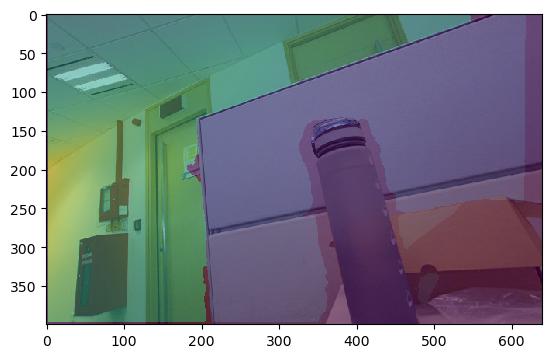

In [52]:
# Overlay image overdepth at half alpha
plt.imshow(depth)
plt.imshow(img, alpha=0.5)

/Depth-Anything-V2


/tmp/ipykernel_25131/3502881802.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'/scratchdata/depth_anything_v2_vitl.pth', map_locatio

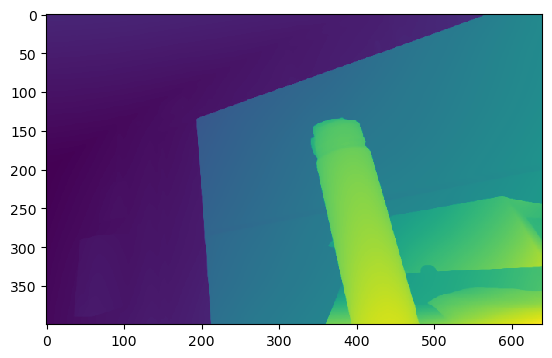

In [53]:
import os
os.chdir("/Depth-Anything-V2")
print(os.getcwd())

import cv2
import torch

from depth_anything_v2.dpt import DepthAnythingV2

DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}

encoder = 'vitl' # or 'vits', 'vitb', 'vitg'

model = DepthAnythingV2(**model_configs[encoder])
model.load_state_dict(torch.load(f'/scratchdata/depth_anything_v2_vitl.pth', map_location='cpu'))
model = model.to(DEVICE).eval()

est_depth = model.infer_image(np.array(img)) # HxW raw depth map in numpy
plt.imshow(est_depth)

In [54]:
print(est_depth[0,0])
print(est_depth[-1,0])

70.127785
13.976424


In [55]:
import json

with open(os.path.join(DATAFILE,"masks.json"),"r") as f:
    masks = json.load(f)
    

FileNotFoundError: [Errno 2] No such file or directory: '/scratchdata/doors/masks.json'

Percentage of inliers:  0.8847744664226324
Percentage of inliers:  0.996614308708442
Percentage of inliers:  0.9209468997719622
Percentage of inliers:  0.8079920646166926
Percentage of inliers:  0.9894627292832054
Percentage of inliers:  0.8775823397473734
Percentage of inliers:  0.8681682322801024
Percentage of inliers:  1.0
Percentage of inliers:  0.7673410404624278
Percentage of inliers:  0.8436382754994742
Percentage of inliers:  0.8876669285153181
Percentage of inliers:  0.6189759036144579
Percentage of inliers:  1.0
Percentage of inliers:  0.9007765314926661
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  0.9938482570061518
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:

Percentage of inliers:  0.7633262260127932
Percentage of inliers:  0.714078374455733
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  0.9888771186440678
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  0.9975323874151758
Percentage of inliers:  0.9261992619926199
Percentage of inliers:  1.0
Percentage of inliers:  0.9801285797779077
Percentage of inliers:  1.0
Percentage of inliers:  0.7637130801687764
Percentage of inliers:  1.0
Percentage of inliers:  0.5626911314984709
Percentage of inliers:  0.6196319018404908
Percentage of inliers:  0.853763440860215
Percentage of inliers:  0.7196467991169978
Percentage of inliers:  0.9823702252693438
Percentage of inliers:  1.0
Percentage of inliers:  0.9862796833773088
Percentage of inliers:  1.0
Percentage of inliers:  0.6748466257668712
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percentage of inliers:  1.0
Percenta

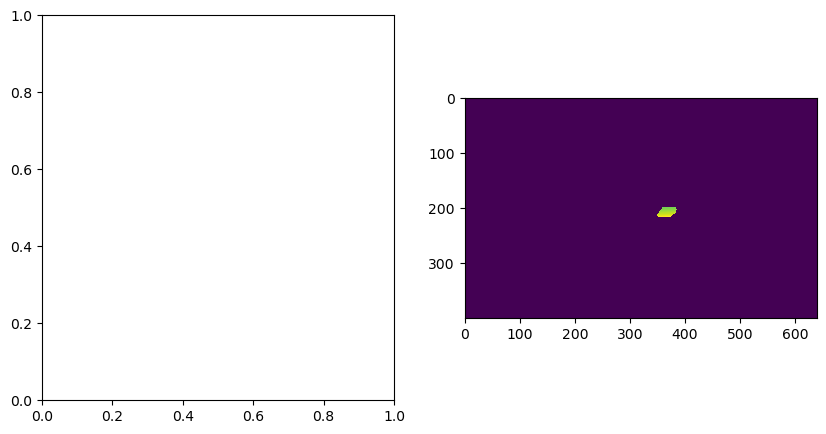

In [ ]:
#Subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

all_corrected_depth = depth.copy()

POLYNOMIAL_ORDER = 5

est_depth_flatten = est_depth.flatten().reshape(-1,1)

for mask in masks["sam"]:
    #if mask["area"] < 2000: continue
    mask = mask["segmentation"]
    mask = np.array(mask)
    
    #Select the depth and est_depth values that corresponds to the mask
    selected_depth = np.zeros_like(depth)
    selected_est_depth = np.zeros_like(est_depth)
    
    selected_depth[mask==1] = depth[mask==1]
    selected_est_depth[mask==1] = est_depth[mask==1]

    #Plot scatter plot of the depth vs est_depth
    #normalised_selected_depth = depth_filtering.normalise(selected_depth)
    #normalsised_selected_est_depth = depth_filtering.normalise(selected_est_depth)
    #normalsised_selected_est_depth = 1 - normalsised_selected_est_depth
    #axs[1].scatter(normalised_selected_depth, normalsised_selected_est_depth)

    if (selected_depth[selected_depth!=0].reshape(-1,1).shape[0]<=POLYNOMIAL_ORDER+1): continue

    #Use RANSAC to find the best fit line
    ransac = RANSACRegressor(max_trials=10000,)

    ransac_X = selected_est_depth[selected_depth!=0].reshape(-1,1)
    ransac_y = selected_depth[selected_depth!=0].reshape(-1,1)
    
    model = make_pipeline(PolynomialFeatures(degree=POLYNOMIAL_ORDER), 
                          RANSACRegressor(estimator=LinearRegression()))

    # Fit the model
    model.fit(ransac_X, ransac_y)

    # Predict using the fitted model
    y_pred = model.predict(ransac_X)
    
    inlier_mask = model.named_steps['ransacregressor'].inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    # Show ratio of inliers/outliers
    #print(f"RANSAC: {sum(inlier_mask)}/{len(inlier_mask)} inliers")
    print("Percentage of inliers: ", sum(inlier_mask)/len(inlier_mask))
    
    if (sum(inlier_mask)/len(inlier_mask) < 0.8): continue    
    
    # Get the best fit line
    
    corrected_depth = model.predict(est_depth_flatten).reshape(est_depth.shape)
    visualise = np.zeros_like(selected_depth)
    visualise[mask==1] = corrected_depth[mask==1]
    axs[1].imshow(visualise)
    
    all_corrected_depth[mask==1] = corrected_depth[mask==1]
    #break

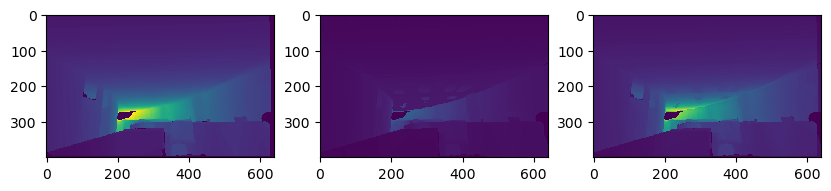

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))


axs[0].imshow(depth_filtering.normalise(depth))
axs[1].imshow(depth_filtering.normalise(-est_depth))
axs[1].imshow(depth_filtering.normalise(all_corrected_depth))
axs[2].imshow(abs(depth_filtering.normalise(depth) - depth_filtering.normalise(all_corrected_depth)))

plt.show()